In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def init_populations(chrom_length,popu_length):

    individuals = []

    for i in range(popu_length):

        chromosome = []
        for j in range(chrom_length):

            p = np.random.rand()
            if p < 0.5:
                chromosome.append('1')
            else:
                chromosome.append('0')

        individuals.append(chromosome)
    return individuals


In [3]:
pop = init_populations(16,20)
pop[0]

['0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1']

In [4]:


def decode(var):
    var = ''.join(var)
    var = int(var,2)
    x = var

    x1 = ((3+3)/((2**8)-1))*x -3

    return x1


In [5]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

In [6]:
list =[]
for i in range(100):
    for j in range(100):
        x1 = x[i]
        y1 = y[j]
        
        
        z = 3 * (1-x1)**2 * np.exp(-x1**2 - (y1+1)**2) - 10 * ((x1/5) - x1**3 - y1**5) * np.exp(-x1**2 - y1**2) - (1/3) * np.exp(-(x1+1)**2 - y1**2)
        if z <= 0:
            list.append(z)
            

In [7]:
min(list)

-6.541861464796368e+00

In [8]:
z = 3 * (1-x)**2 * np.exp(-x**2 - (y+1)**2) - 10 * ((x/5) - x**3 - y**5) * np.exp(-x**2 - y**2) - (1/3) * np.exp(-(x+1)**2 - y**2)

In [9]:
def fitness(chromosome):
    x = decode(chromosome[:8])
    y = decode(chromosome[8:])
    
    z = 3 * (1-x)**2 * np.exp(-x**2 - (y+1)**2) - 10 * ((x/5) - x**3 - y**5) * np.exp(-x**2 - y**2) - (1/3) * np.exp(-(x+1)**2 - y**2)

    return z + 7

In [10]:
def prob_fitness(pop):
    probs = []
    cumulative_prob = []
    fitnesses = []
    acc = 0

    for i in range(len(pop)):
        fitnesses.append(fitness(pop[i]))

        acc += fitnesses[i]

        cumulative_prob.append(acc)
    for j in range(len(pop)):
        probs.append(fitnesses[j]/acc)

    return probs, cumulative_prob,fitnesses
    

In [11]:
prob_fitness(pop)[0]

[1.5947141911884316e-02,
 0.04946278247355234,
 0.03530869318501476,
 0.04892146400007027,
 0.047994057347015874,
 0.06584618599755944,
 0.04923627586167452,
 0.009953702892005062,
 0.06104075781982537,
 0.03983366690237487,
 0.046224293800587096,
 0.058164803871586956,
 0.05890817377386947,
 0.049257535169963215,
 0.07445786605927208,
 0.07482473397672802,
 0.05560239741330526,
 0.04959620247351029,
 0.060071511986993543,
 0.049347753083207394]

In [12]:
probs, cumulative_fit, fitnesses = prob_fitness(pop)

In [13]:
def roullete(cumulative_fit,pop):
    selected_ind = []

    for i in range(2):
        ran = np.random.rand() * cumulative_fit[-1]

        s = 0

        while ran > cumulative_fit[s]:
            s += 1

        selected_ind.append(pop[s])
    return selected_ind

In [14]:
def crossover(p_cross, cumulative_fit, popu_length,pop,chrom_length):
    
    new_gen = []

    while len(new_gen)<popu_length:
        
        selected_ind = roullete(cumulative_fit,pop)

        ind1 = selected_ind[0]
        ind2 = selected_ind[1]

        p = np.random.rand()

        if p < p_cross:

            cut = np.random.randint(1,chrom_length-1)

            new_ind1 = ind1[:cut] + ind2[cut:]
            new_ind2 = ind2[:cut] + ind1[cut:]

            new_gen.append(new_ind1)
            new_gen.append(new_ind2)
    return new_gen


In [15]:
p_cross=0.9
popu_length=20
chrom_length=16
p_mutation=0.01
number_gen =100
new_gen = crossover(p_cross, cumulative_fit, popu_length,pop,chrom_length)

In [16]:
def mutation(new_gen,p_mutation,chrom_length):

    for i in range(len(new_gen)):
        for j in range(chrom_length):
            p= np.random.rand()
            if p<p_mutation:
                new_gen[i][j]= '0' if new_gen[i][j]=='0' else '1'
    return new_gen

In [25]:
mutation(new_gen,p_mutation,chrom_length)[0]

['1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0']

In [18]:
def genetic_algo(p_cross,p_mutation,popu_length,chrom_length,number_gen):
    min, max, mean, best_chrom = [], [],[], []

    pop = init_populations(chrom_length,popu_length)

    probs, cumulative_fit, fitnesses = prob_fitness(pop)
    
    best_chrom.append(pop[np.argmax(fitnesses)])
    
    min.append(np.min(fitnesses))
    max.append(np.max(fitnesses))
    mean.append(np.mean(fitnesses))
    
    for i in range(number_gen):
        new_gen = crossover(p_cross, cumulative_fit, popu_length,pop,chrom_length)

        new_gen = mutation(new_gen,p_mutation,chrom_length)
        probs, cumulative_fit, fitnesses = prob_fitness(new_gen)
   
        best_chrom.append(new_gen[np.argmax(fitnesses)])

        min.append(np.min(fitnesses))
        max.append(np.max(fitnesses))
        mean.append(np.mean(fitnesses))

    return min, max, mean, best_chrom


In [26]:
p_cross=0.9
popu_length=20
chrom_length=16
p_mutation=0.01
number_gen=100
rand_state=42
min, max, mean, best_chrom = genetic_algo(p_cross,p_mutation,popu_length,chrom_length,number_gen,rand_state)
best_chrom

[['1',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1'],
 ['1',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '0',
  '1',
  '1',
  '0'],
 ['0',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '1'],
 ['0',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  '0',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0'],
 ['1',
  '0',
  '1',
  '1',
  '1',
  '1',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1'],
 ['1',
  '0',
  '1',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '1'],
 ['1',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '1',
  '1',
  '0'],
 ['1',
  '0',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0'],
 ['1',
  '0',
  '1',
  '1',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '1'

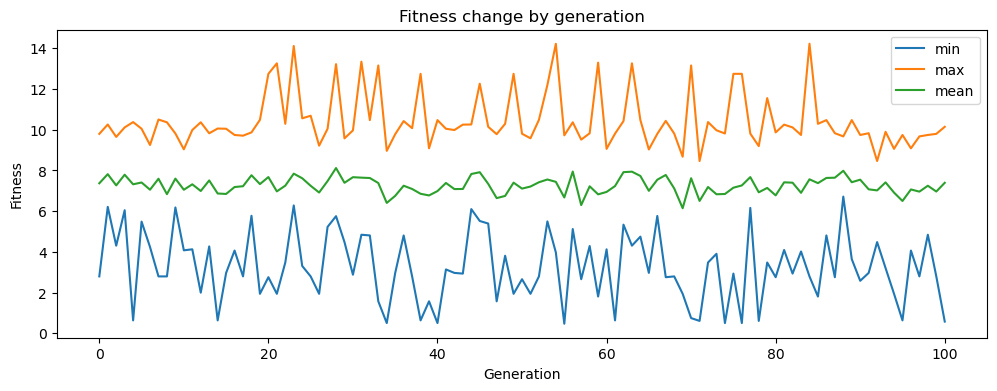

In [27]:
plt.figure(figsize=(12,4))
plt.plot( min, label="min")
plt.plot(max,label="max")
plt.plot(mean, label="mean")
plt.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness change by generation")
plt.show()